#BIPARTITION ALGORITHUM
#Import all the neccesary libraries



In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import data set

In [5]:
G = nx.karate_club_graph()
print(G) 

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


# Extract adjacency matrix 'A'
so, k="degree vector"
    m="number of edges"
    n="no. of nodes"

In [33]:
n_list=list(G.nodes())
n=len(n_list)

A=nx.to_numpy_array(G,nodelist=n_list)
k=np.array([G.degree(node) for node in n_list]).reshape(n,1)
m=G.number_of_edges()
print("Adjacency Matrix A:\n", A)
print("\nDegree Vector k:\n", k)
print("\nTotal Edges m:", m)

Adjacency Matrix A:
 [[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]

Degree Vector k:
 [[16]
 [ 9]
 [10]
 [ 6]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 2]
 [ 3]
 [ 1]
 [ 2]
 [ 5]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 2]
 [ 2]
 [ 2]
 [ 5]
 [ 3]
 [ 3]
 [ 2]
 [ 4]
 [ 3]
 [ 4]
 [ 4]
 [ 6]
 [12]
 [17]]

Total Edges m: 78


Now, compute our Modularity Matrix


In [34]:
B = A - (k @ k.T) / (2*m)
print(B)

[[-1.64102564  3.07692308  3.97435897 ...  1.38461538 -1.23076923
  -1.74358974]
 [ 3.07692308 -0.51923077  5.42307692 ... -0.34615385 -0.69230769
  -0.98076923]
 [ 3.97435897  5.42307692 -0.64102564 ... -0.38461538  1.23076923
  -1.08974359]
 ...
 [ 1.38461538 -0.34615385 -0.38461538 ... -0.23076923  3.53846154
   3.34615385]
 [-1.23076923 -0.69230769  1.23076923 ...  3.53846154 -0.92307692
   3.69230769]
 [-1.74358974 -0.98076923 -1.08974359 ...  3.34615385  3.69230769
  -1.8525641 ]]


now define modularity score Q.

Q = (1/(4*m)) * s^T B s

We need to maximise Q, which means that we must maximise s^tBs.
Since going through all possible combinations of s is not realistically possible, we use a trick in optimization.

Therefore, now our problem is reduced to finding the eigenvector of B.

In [35]:
def modularity_from_s(B, s, m):
    s = np.asarray(s).reshape(-1, 1)  # ensure column vector
    Q = float((s.T @ B @ s) / (4 * m))
    return Q

eigvals, eigvecs = np.linalg.eigh(B)
u=np.argmax(eigvals) # u is index of max eigenvalue
lambda_1=eigvals[u] # max eigen value
leading_vec = eigvecs[:, u]
s = np.where(leading_vec >= 0, 1, -1)  # s in {+1, -1}
#Q = modularity_from_s(B, s, m)
print("largest eigen value",lambda_1)
print("\nleading eigen vector:\n", leading_vec)


largest eigen value 17.107386763280694

leading eigen vector:
 [-0.32365173 -0.32525797 -0.26399012 -0.2423719  -0.08231957 -0.10763723
 -0.10534045 -0.21899159  0.04046967  0.02468171 -0.07180498 -0.05697514
 -0.06185916 -0.18088488  0.09998153  0.1405319  -0.03778568 -0.05728769
  0.06006922 -0.05624387  0.07970634 -0.07630041  0.10030056  0.29584494
  0.06714587  0.17810773  0.08482204  0.13031193  0.03315935  0.19121343
  0.08889084  0.20638044  0.34139764  0.34685546]


Now since we have got the leaing eigen vector split them into two communities based on their sign. 

In [36]:
node_array = np.array(n_list)
community_1 = node_array[leading_vec>0].tolist()
community_2 = node_array[leading_vec<=0].tolist()
print("\nCommunity 1 nodes:", community_1)
print("Community 2 nodes:", community_2)


Community 1 nodes: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community 2 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]


VISUALISE THE SPLITTED COMMUNITIES

"""Draw the graph with nodes colored by their community."""
1. plot the graph with fig size 8,6
2. asign each community random colours.
3. draw edges and label 

In [37]:
def plot_community_iteration(G, communities, pos, title=""):
    plt.figure(figsize=(8, 4))

    colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'orange', 'lightgray']
    node_color_map = {}

    for i, community in enumerate(communities):
        for node in community:
            node_color_map[node] = colors[i % len(colors)] 


    node_colors = [node_color_map.get(node, 'lightgray') for node in G.nodes()]

    nx.draw(
        G,
        pos=pos,
        with_labels=True,
        node_color=node_colors,
        node_size=500,
        font_color='black',
        edge_color='gray'
    )

    plt.title(title, fontsize=14)
    plt.show()


Visualize how communities evolve over the first iterations.

Checks if a community can be divided into two smaller ones.
    If yes, returns the two groups. If not, returns None.

In [38]:
def find_split(G, community_nodes, total_edges):
    subgraph = G.subgraph(community_nodes)
    nodes = list(subgraph.nodes())

    if len(nodes) <= 1:
        return None

    A = nx.to_numpy_array(subgraph, nodelist=nodes)
    degrees = np.array([G.degree(n) for n in nodes]).reshape(len(nodes), 1)
    B = A - (degrees @ degrees.T) / (2 * total_edges)
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    max_eigenvalue = np.max(eigenvalues)

    if max_eigenvalue < 1e-10:
      return None

    main_vector = eigenvectors[:, np.argmax(eigenvalues)]
    group1 = [nodes[i] for i in range(len(nodes)) if main_vector[i] > 0]
    group2 = [nodes[i] for i in range(len(nodes)) if main_vector[i] <= 0]
    if not group1 or not group2:
      return None

    return group1, group2


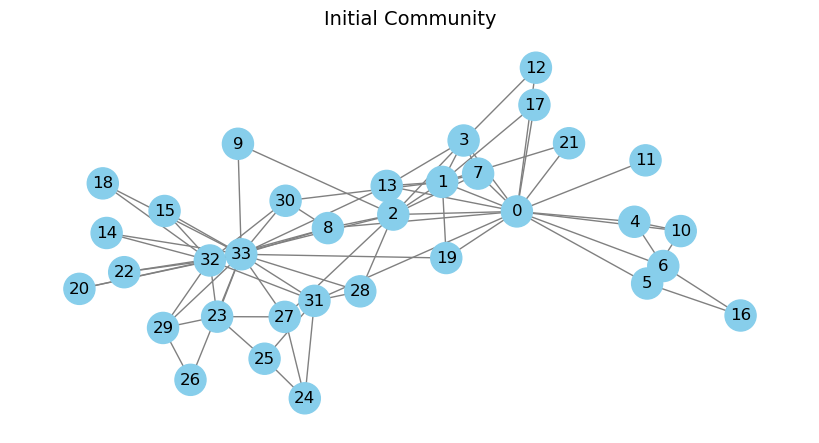

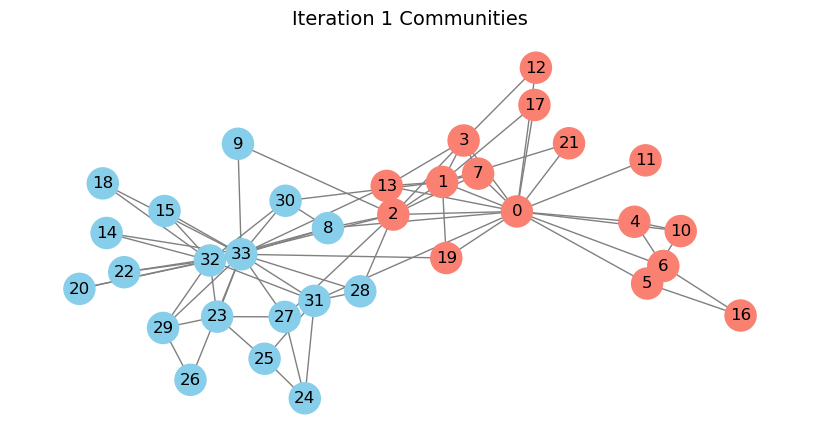

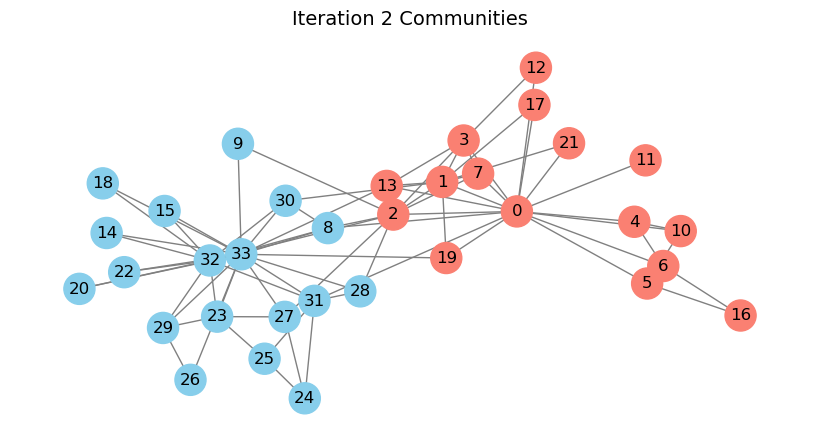

 No further splits possible after iteration 2.

Final communities:
 [[8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]]


In [39]:
def repeat_community_split(G, max_iterations=5):
    total_edges = G.number_of_edges()
    pos = nx.spring_layout(G, seed=32)
    communities = [list(G.nodes())]
 
    plot_community_iteration(G, communities, pos, title="Initial Community")

    for iteration in range(1, max_iterations + 1):
        new_communities = []
        changed = False

        for comm in communities:
            result = find_split(G, comm, total_edges)
            if result is not None:
                new_communities.extend(result)
                changed = True
            else:
                new_communities.append(comm)

        communities = new_communities
        plot_community_iteration(G, communities, pos, title=f"Iteration {iteration} Communities")

        if not changed:
            print(f" No further splits possible after iteration {iteration}.")
            break

    return communities
final_communities = repeat_community_split(G, max_iterations=5)

print("\nFinal communities:\n", final_communities)

In [40]:
def compute_final_modularity(G, B, community_assignments, nodes):
    n = len(nodes)
    m = G.number_of_edges()
    final_assignment_vector = np.zeros((n, 1))
    community_to_sign = {c_id: 1 if c_id % 2 == 0 else -1 for c_id in set(community_assignments.values())}
    for i, node in enumerate(nodes):
        c_id = community_assignments[node]
        final_assignment_vector[i] = community_to_sign[c_id]
    Q = (1 / (4 * m)) * final_assignment_vector.T @ B_global @ final_assignment_vector
    partition_map = defaultdict(list)
    for node, cid in community_assignments.items():
        partition_map[cid].append(node)
    partition = [set(members) for members in partition_map.values()]
    Q_score_nx = modularity(G, partition)
    print(f"Final Modularity Score (Q): {Q[0, 0]:.4f}")
    print(f"Final Modularity Score (networkx.modularity): {Q_score_nx:.4f}")

In [41]:
metric_history = {
    'Degree Centrality': {},
    'Betweenness Centrality': {},
    'Closeness Centrality': {},
    'Clustering Coefficient': {}
}

iteration_count = 0  # start with iteration 0

# Compute metrics for iteration 0 (initial graph)
metric_history['Degree Centrality'][iteration_count] = nx.degree_centrality(G)
metric_history['Betweenness Centrality'][iteration_count] = nx.betweenness_centrality(G)
metric_history['Closeness Centrality'][iteration_count] = nx.closeness_centrality(G)
metric_history['Clustering Coefficient'][iteration_count] = nx.clustering(G)

Metric Evolution and Final Discussion
Finally, we need to show how each node's metrics evolve across successive iterations.

C:\Users\jugna\AppData\Local\Temp\ipykernel_9792\1591755114.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


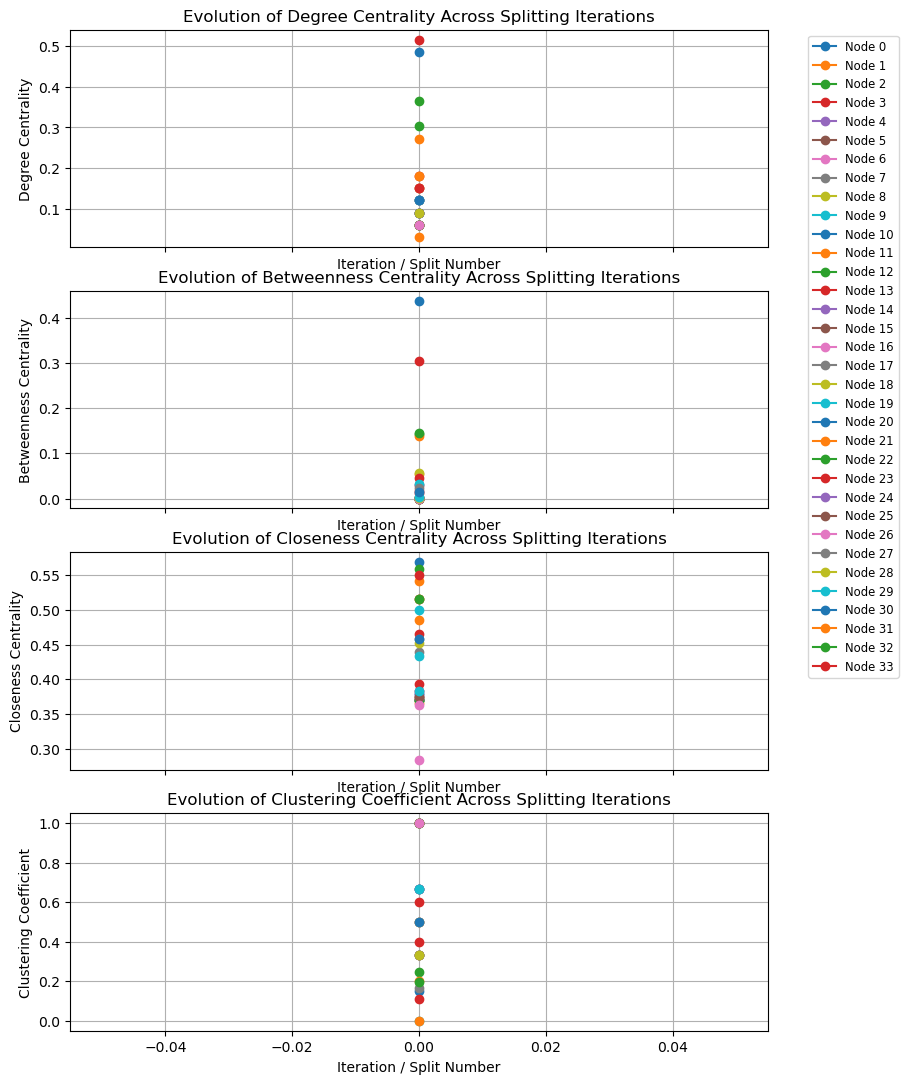

In [42]:
def plot_all_metrics(metric_history, nodes, iteration_count):
    metrics = ['Degree Centrality', 'Betweenness Centrality', 
               'Closeness Centrality', 'Clustering Coefficient']

    fig, axes = plt.subplots(4, 1, figsize=(9,13),sharex=True)
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        ax = axes[i]
        iteration_keys = sorted(metric_history[metric].keys()) 
        for node in nodes:
           ax.plot(range(len(iteration_keys)),
              [metric_history[metric][it][node] for it in iteration_keys],
             marker='o', label=f'Node {node}')
        ax.set_title(f'Evolution of {metric} Across Splitting Iterations')
        ax.set_xlabel('Iteration / Split Number')
        ax.set_ylabel(metric)
        ax.grid(True)
        if i == 0:
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=1)


    plt.subplots_adjust()
    plt.show()



plot_all_metrics(metric_history, list(G.nodes()), iteration_count)